In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [67]:
df = pd.read_excel(r"C:\Users\SANJAN PANDIT\Downloads\Copy of loan.xlsx")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


#  EDA

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [69]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Log Transformation of Loan Amount
Visualizing the distribution of loan amounts after applying a logarithmic transformation to reduce skewness

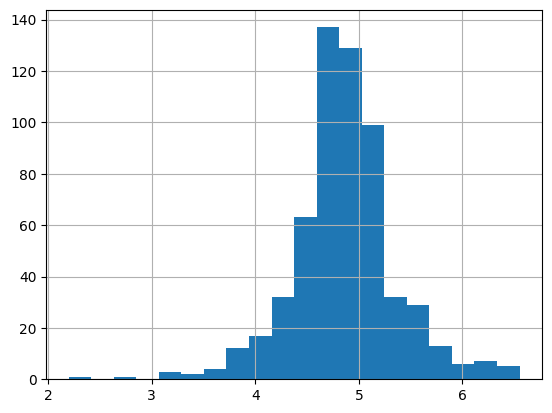

In [70]:
df['loanAmount_log'] = np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins = 20)
plt.show()

In [71]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
dtype: int64

### Log Transformations and creating a new column which is TotalIncome
Total Income of employee is equal to ApplicantIncome + CoapplicantIncome in per months 

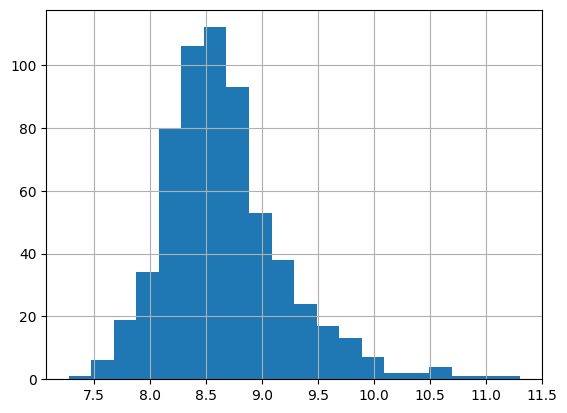

In [72]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins = 20)
plt.show()

## Handling null value:
handle the numerical data type column with mean and categorical with mode 

In [73]:
# Instead of using inplace=True, assign the result back to the DataFrame
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['loanAmount_log'] = df['loanAmount_log'].fillna(df['loanAmount_log'].mean())


In [74]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [75]:
print('percentage of missing gender is %2f%%'%((df['Gender'].isnull()).sum()/df.shape[0]*100))

percentage of missing gender is 0.000000%


Number of people who take loan as group by gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


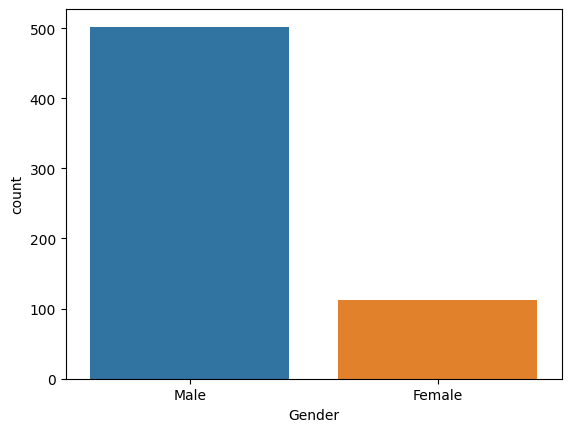

In [76]:
print('Number of people who take loan as group by gender:')
print(df['Gender'].value_counts())
sns.countplot(x = 'Gender',data = df,hue='Gender')
plt.show()

Number of people who take loan as group by Married:
Married
Yes    401
No     213
Name: count, dtype: int64


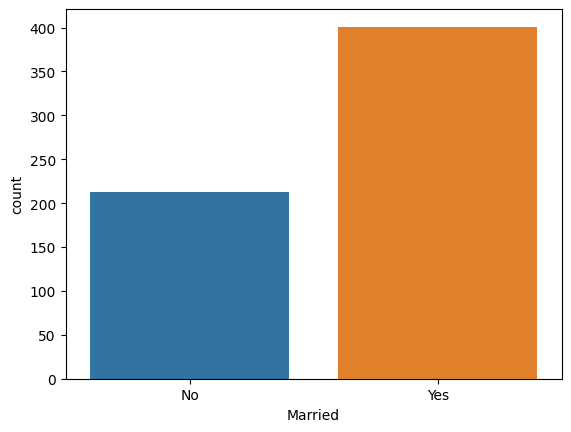

In [77]:
print('Number of people who take loan as group by Married:')
print(df['Married'].value_counts())
sns.countplot(x = 'Married',data = df,hue='Married')
plt.show()

Number of people who take loan as group by Dependents:
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


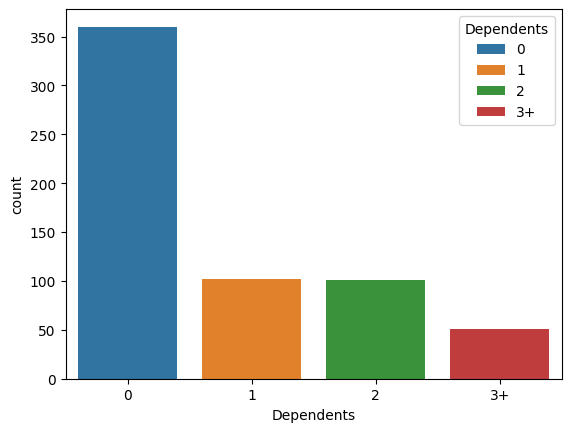

In [78]:
print('Number of people who take loan as group by Dependents:')
print(df['Dependents'].value_counts())
sns.countplot(x = 'Dependents',data = df,hue='Dependents')
plt.show()

Number of people who take loan as group by Self_Employed:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


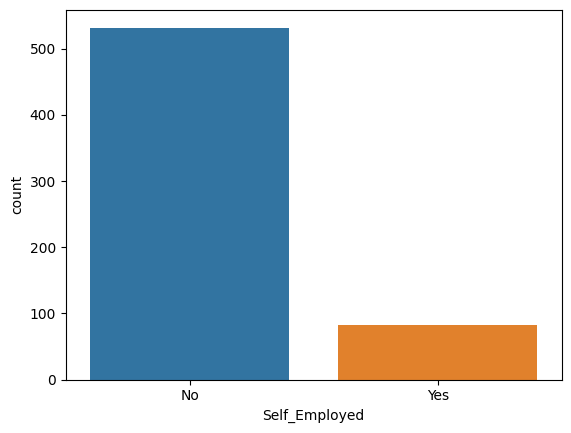

In [79]:
print('Number of people who take loan as group by Self_Employed:')
print(df['Self_Employed'].value_counts())
sns.countplot(x = 'Self_Employed',data = df,hue='Self_Employed')
plt.show()

Number of people who take loan as group by LoanAmount:
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


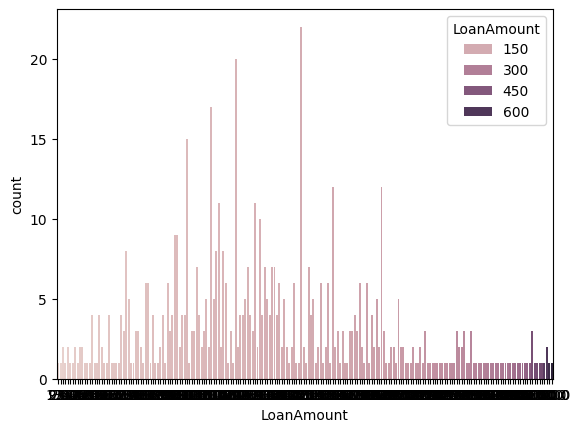

In [80]:
print('Number of people who take loan as group by LoanAmount:')
print(df['LoanAmount'].value_counts())
sns.countplot(x = 'LoanAmount',data = df,hue='LoanAmount')
plt.show()

Number of people who take loan as group by Credit_History:
Credit_History
1.000000    475
0.000000     89
0.842199     50
Name: count, dtype: int64


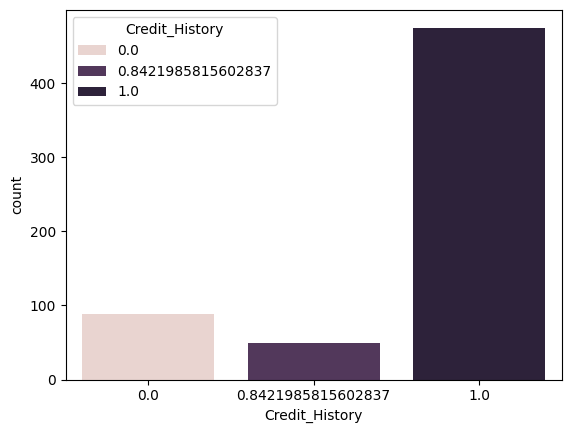

In [81]:
print('Number of people who take loan as group by Credit_History:')
print(df['Credit_History'].value_counts())
sns.countplot(x = 'Credit_History',data = df,hue='Credit_History')
plt.show()

# Features Selection

In [82]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568


Gender, Married, Dependents, Education, Loan_Amount_Term, Credit_History, Property_Area, loanAmount_log, TotalIncome_log

In [83]:
x = df.iloc[:,np.r_[1:6,9:12,13,15]].values
y = df.iloc[:,12].values

In [84]:
df.iloc[:,np.r_[9:12]]

,Loan_Amount_Term,Credit_History,Property_Area
0,360.0,1.0,Urban
1,360.0,1.0,Rural
2,360.0,1.0,Urban
3,360.0,1.0,Urban
4,360.0,1.0,Urban
...,...,...,...
609,360.0,1.0,Rural
610,180.0,1.0,Rural
611,360.0,1.0,Urban
612,360.0,1.0,Urban


# Label Encoding

In [85]:
LabelEncoder_x = LabelEncoder()

# Training and testing

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size= 0.2,random_state= 0)

In [87]:
for i in range (0,5):
    x_train[:,i] = LabelEncoder_x.fit_transform(x_train[:,i].astype(str))
    x_train[:,7] = LabelEncoder_x.fit_transform(x_train[:,7].astype(str))

In [88]:
LabelEncoder_y = LabelEncoder()
y_train = LabelEncoder_y.fit_transform(y_train)

In [89]:
for i in range (0,5):
    x_test[:,i] = LabelEncoder_x.fit_transform(x_test[:,i].astype(str))
    x_test[:,7] = LabelEncoder_x.fit_transform(x_test[:,7].astype(str))

In [90]:
LabelEncoder_y = LabelEncoder()
y_test = LabelEncoder_y.fit_transform(y_test)

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

# Model selection

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)


In [93]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [94]:
from sklearn import metrics
y_pred = rf_clf.predict(x_test)
print("Accurricy of random forest clf is ", metrics.accuracy_score(y_pred,y_test))
y_pred

Accurricy of random forest clf is  0.7723577235772358


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [95]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)

GaussianNB()

In [96]:
y_pred = nb_clf.predict(x_test)
print("Acc of naiv bayes is ", metrics.accuracy_score(y_pred,y_test))

Acc of naiv bayes is  0.8292682926829268


In [97]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [100]:
y_pred = dt_clf.predict(x_test)
print("Acc of DT ", metrics.accuracy_score(y_pred,y_test))

Acc of DT  0.7154471544715447


In [101]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [102]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [103]:
y_pred = kn_clf.predict(x_test)
print("Acc of KN is ", metrics.accuracy_score(y_pred,y_test))

Acc of KN is  0.8211382113821138
